# Tutorial: Data Science in Finance

## Introduction



In this tutorial, we will be focusing on data science and visualization can be applied to the field of finance. This tutorial will go through one of many ways that we can use data science to help us better evaluate a company's performance by walking through some basic financial calculations and visualization. As always we want to quantitatively study the performance of a company to determine if the share of company is overvalued or undervalued. While crunching numbers are important, visualizing a company's performance is just as important. For example, when presenting the findings to potential customers/clients, it is important that the visuals used are helpful in portraying what the data is showing. Here is a very simple example of a graph showing the price of Netflix (NFLX) from Yahoo Finance. This is a much more efficient way to showing price over time rather than just a table listing the prices. 

<img src="files/net.png">

From this graph, we can tell in an instant that Netflix has been price/share is increasing over time.

## Tutorial Contents 

We will cover: 

1) How to obtain financial data for a certain company 
<br>
2) How to make a Volume and OHLC graph
<br>
3) How to turn make a candlestick graph
<br>
4) How to calculate the moving average with different windows
<br>
5) How to scrape the S&P 500 tickers 
<br>
6) How to make a compound return of of portofilo 




# Libraries we will be using

Here is a list of libraries that we will be using in this tutorial. Most of these are libraries we used in class. However, the a new one is webbrowser. Webbrower allows us to open a link in our current broswer. We will be using this to obtain the download link for our data. This will be explained below.

In [5]:

import datetime as dt 
import matplotlib.pyplot as plt
from matplotlib import style 
import pandas as pd
import requests
from bs4 import BeautifulSoup
import webbrowser  
import matplotlib as mpl
from matplotlib.finance import candlestick_ohlc
import matplotlib as mlp
import datetime
import time

The first thing that we will have to to do is obtain a csv of the financial data. As of the begining of this year, the Yahoo API has changed a lot and as a result, we are unable to use pandas_data_reader to obtain the finacial data from Yahoo. The same thing happened with for the Electronic Data Gathering, Analysis, and Retrieval system (EDGAR) API. Becuase of this, we will obtain the data from Yahoo's query. The function below takes a string, a start date and an end date and will download the csv from yahoo's website. Since we have to use unix time, we had use Python's time library and convert our time, which is passed in as a string, to unix time. Once we have the ticker, start, and end time, we can pass format our URL. Then we can pass the url to webbroswer.open(url), which will open the download link in your browser. Once this is run, we have have downloaded our csv. The csv will contain the open, high, low,close, adjusted close, and volume. Since these terms might be new to those not in the finance field, we will give a simple break down. Open is the price of the stock when the market first opens for that day. High is the highest the price reaches during the time the market is open during that day. The low is the lowest the price of the stock dropped to on that day. The adjusted close is the closing price while taking into consideration corporate actions such as stock splits and dividends. This price is usually what investers use to analyze stock price because it is the most accurate. 

In [92]:
def download_csv(tik,start="01/01/2010",end="03/31/2018"):
# the ticker will be a string for the ticker of the company you want
    start =  int(time.mktime(time.strptime(start, '%m/%d/%Y')))
    end = int(time.mktime(time.strptime(end, '%m/%d/%Y')))
    url ="https://query1.finance.yahoo.com/v7/finance/download/%s?period1=%s&period2=%s&interval=1d&events=history&crumb=EAcn1k6rOKw"%(tik,start,end) 
    webbrowser.open(url) #downloads csv
        
#download_csv("AAPL")
    

Now that we have obtained our csv, we can import the data into a panda's dataframe. This way, we can use plot our data. The code below just take in a ticker, formated as a string, and will use the downloaded csv to plot using df.plot().

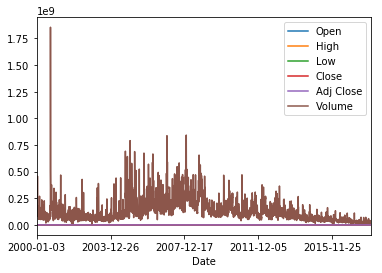

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  3.745536  4.017857  3.631696  3.997768   2.706315  133949200
2000-01-04  3.866071  3.950893  3.613839  3.660714   2.478144  128094400
2000-01-05  3.705357  3.948661  3.678571  3.714286   2.514410  194580400
2000-01-06  3.790179  3.821429  3.392857  3.392857   2.296816  191993200
2000-01-07  3.446429  3.607143  3.410714  3.553571   2.405613  115183600


In [6]:
def make_graph(tik):
    df = pd.read_csv("%s.csv"%tik,index_col = 0)
    df.plot()
    plt.show()
    print(df.head())

make_graph("AAPL")

One of the biggest problems we see from this graph is the fact that the volume dominates everything else. One way to solve this problem will be to read in two of the same data frames. For one the the data frames, we will drop the volume series and for the other data frame, we will drop everything expect the volume series. This will result in two sperate graphs, which we can plot speratlely. Since we want to reshape our graphs, we can just use rcParams["figure.figsize"] = (x,y). 

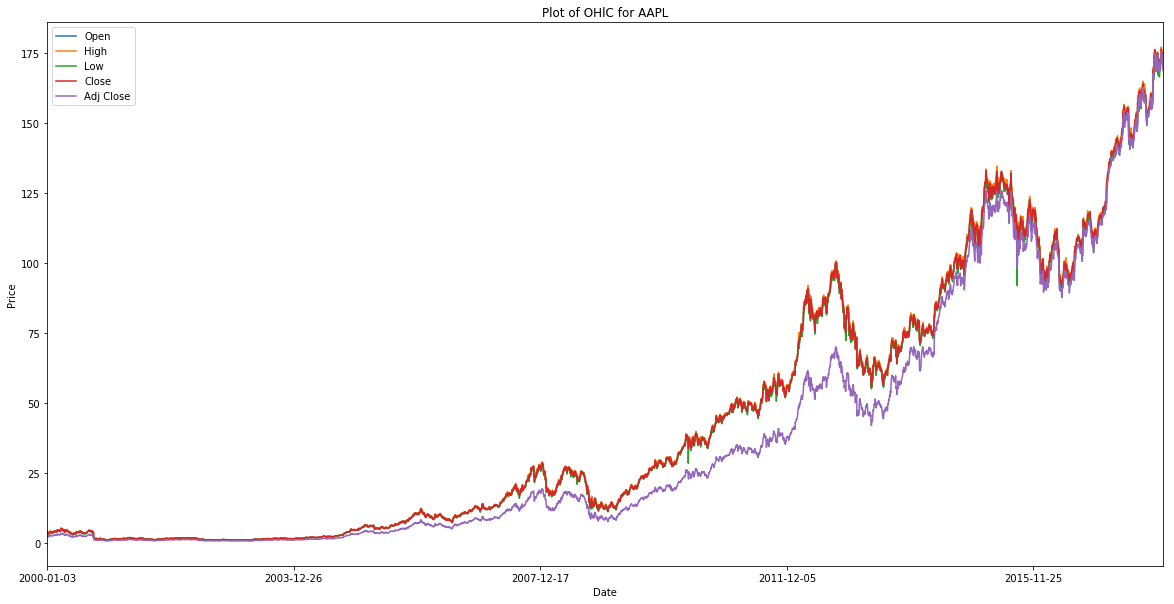

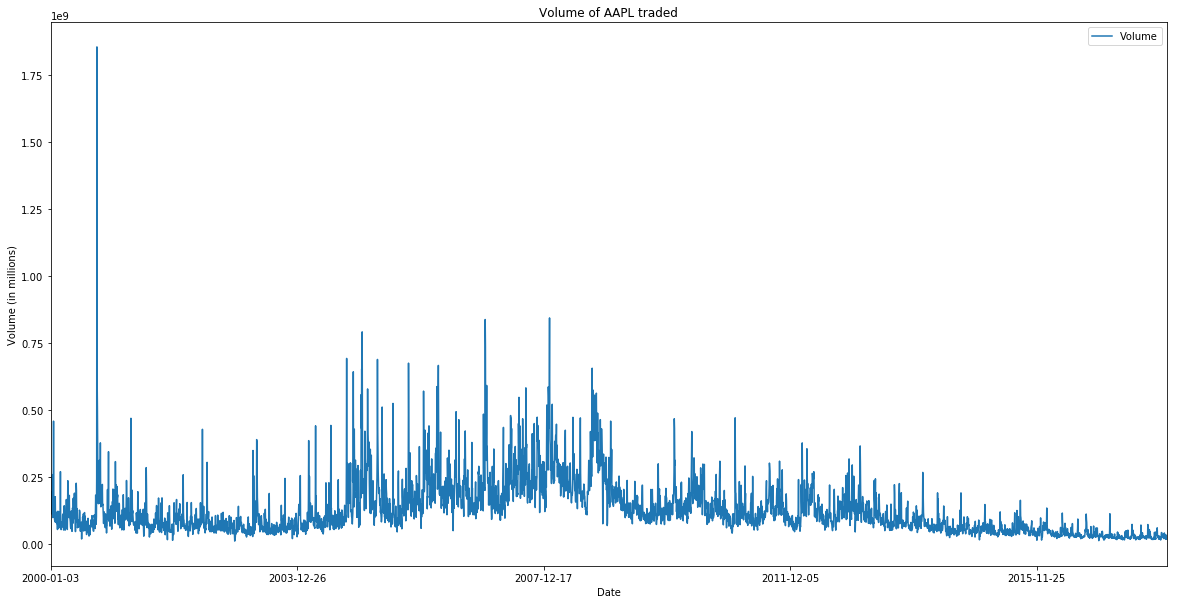

                Open      High       Low     Close  Adj Close
Date                                                         
2000-01-03  3.745536  4.017857  3.631696  3.997768   2.706315
2000-01-04  3.866071  3.950893  3.613839  3.660714   2.478144
2000-01-05  3.705357  3.948661  3.678571  3.714286   2.514410
2000-01-06  3.790179  3.821429  3.392857  3.392857   2.296816
2000-01-07  3.446429  3.607143  3.410714  3.553571   2.405613
<class 'pandas.core.frame.DataFrame'>


In [16]:
#%matplotlib notebook
def make_graph(tik):
    df = pd.read_csv("%s.csv"%tik,index_col = 0)
    volume = pd.read_csv("%s.csv"%tik,index_col = 0)
    
    df = df.drop("Volume",1)
    volume = volume.drop(volume.columns[[0,1,2,3,4]],1)
    
    ohlc = df.plot(title= "Plot of OHlC for %s"%(tik))    
    ohlc.set_xlabel("Date")
    ohlc.set_ylabel("Price")
    volume = volume.plot(title = "Volume of %s traded"%(tik))
    volume.set_xlabel("Date")
    volume.set_ylabel("Volume (in millions)")
    mpl.rcParams['figure.figsize'] = (20,10)
    plt.show()
    
    print(df.head())
    return df,volume

df,volume = make_graph("AAPL")
print(type(df))

From these two simple graphs, we can start seeing the performance of each of the shares of Apple over time. However,  our OHLC graph is rather messy. It is difficult to tell what is happening with all the lines so close to each other. One one we can plot this is a nicer way is by using a candlestick graph. 

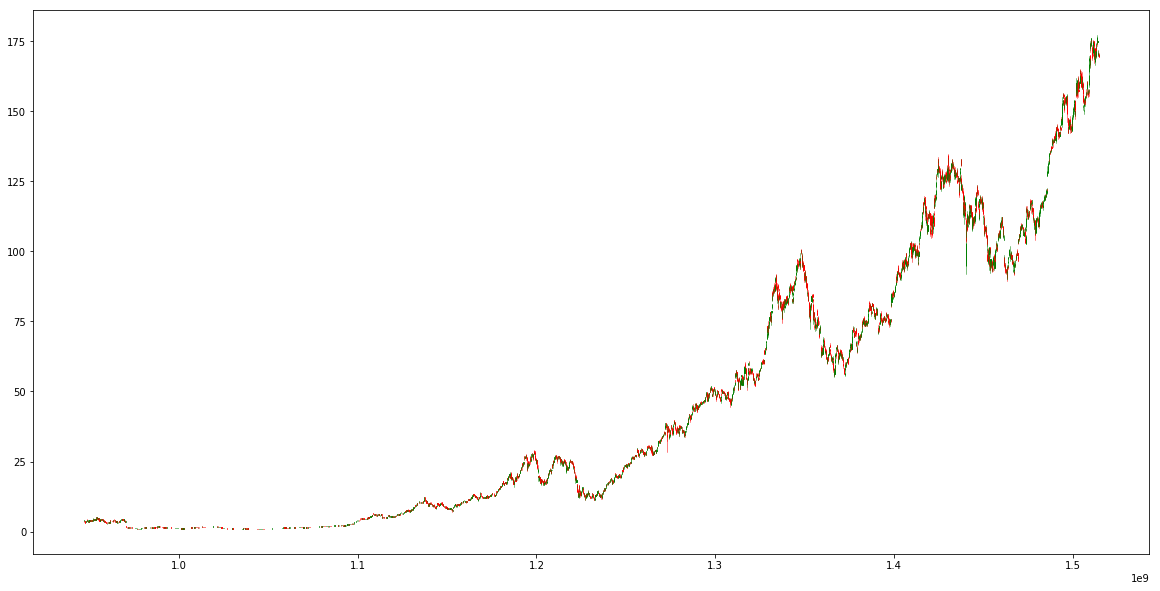

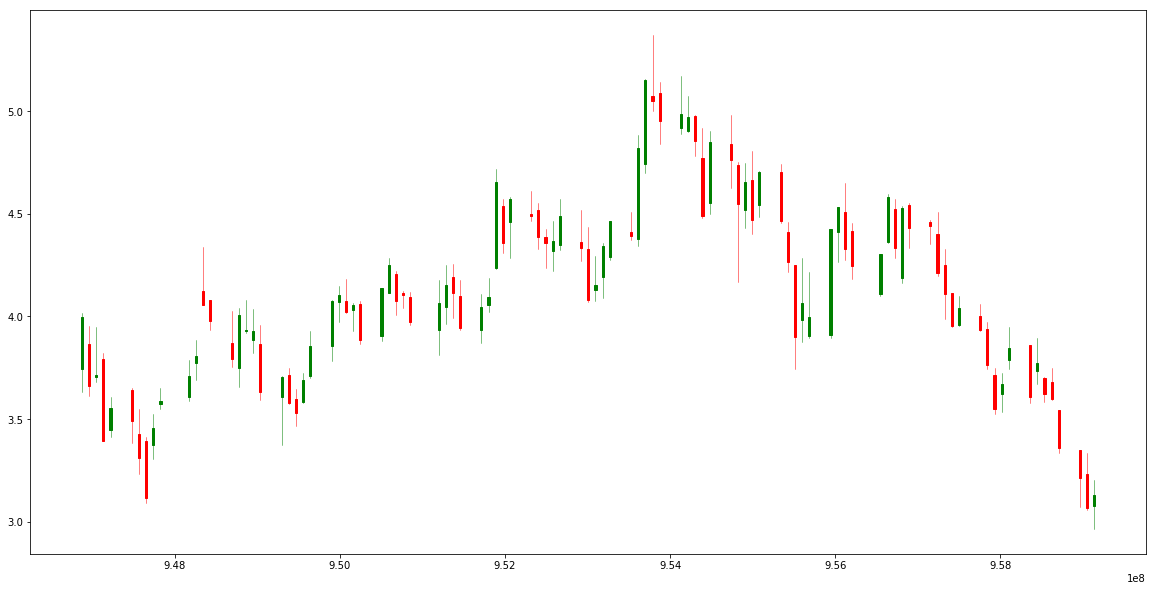

In [75]:
def candle(tik,flag=False,start=0,end=0):
    """"
        tik(string) = ticker of the company
        flag(bool) = do you want to use custom start/end dates?
        start(int) = number of the day (0 means the begining of your data set)
        end(int) = number of the day  (0 means the begining of your data set)
    
        return: modified datafame
    """
    df2 = df = pd.read_csv("%s.csv"%tik)
    if not flag:
        start = 0 
        end = len(df2)
    df2 = df2.as_matrix(columns=df.columns[0:])[start:end] #to prevent long running times, we can limit to x days
    data = []
    data2 = []
    for i in range(len(df2)):
        date = datetime.datetime.strptime(df2[i][0],"%Y-%m-%d") #string time.mktime(t.timetuple()) 
        date = time.mktime(date.timetuple())
        Open = df2[i][1]
        high = df2[i][2]
        low = df2[i][3]
        close = df2[i][4]
        day = (date, Open,high,low,close)
        #print(data)
        data.append(day)
    fig, ax1 = plt.subplots() 
    candle = candlestick_ohlc(ax1,data,width=26000,colorup = "g",colordown="r")
    #ax1.xaxis.set_major_formatter(mlp.dates.DateFormatter("%y-%m-%d"))
    plt.show()
    return(df2)
    
c1 = candle("AAPL")
c2 = candle("AAPL",True,0,100)
    
    
    

As we can see, the candlestick graph was able to include all of the information into one neat graph for use to see. The first one above shows the candlestick graph for for all of the days in our dataset. The second shows only the first 100th days. So let’s try and interpret the graphs. The color signify if the stock ended up closing with a higher price or a lower price. This is case, green means the stock gained value by the end of the day while red means that the stock lost value. The next thing we have to look at is the “box.” The top of the box is the opening price and the bottom of the box is the closing price. The “tails” for each of the candles represents the maximum and minimum price the stock reached during that day. Candlestick are useful because there are many patterns that can indicate with the price will go up or down in the near future. For example, the picture below(from: https://www.investopedia.com/articles/active-trading/092315/5-most-powerful-candlestick-patterns.asp) shows a Two Black Gapping pattern (their black is our red). If observed, there is a 68% chance that the price of the share will fall in the near future. There are many more of these patterns that investors can look for so a candlestick graph is a valuable tools for trying to find patterns in stock prices. 


<img src="files/blackgap.png", style="width: 600px;">

Next, will be looking at another important financial graph, the moving average. Our function will take in a dataframe and a window. The dataframe will contain be what is returned to us by the make_graph function (contains OHLC data).  


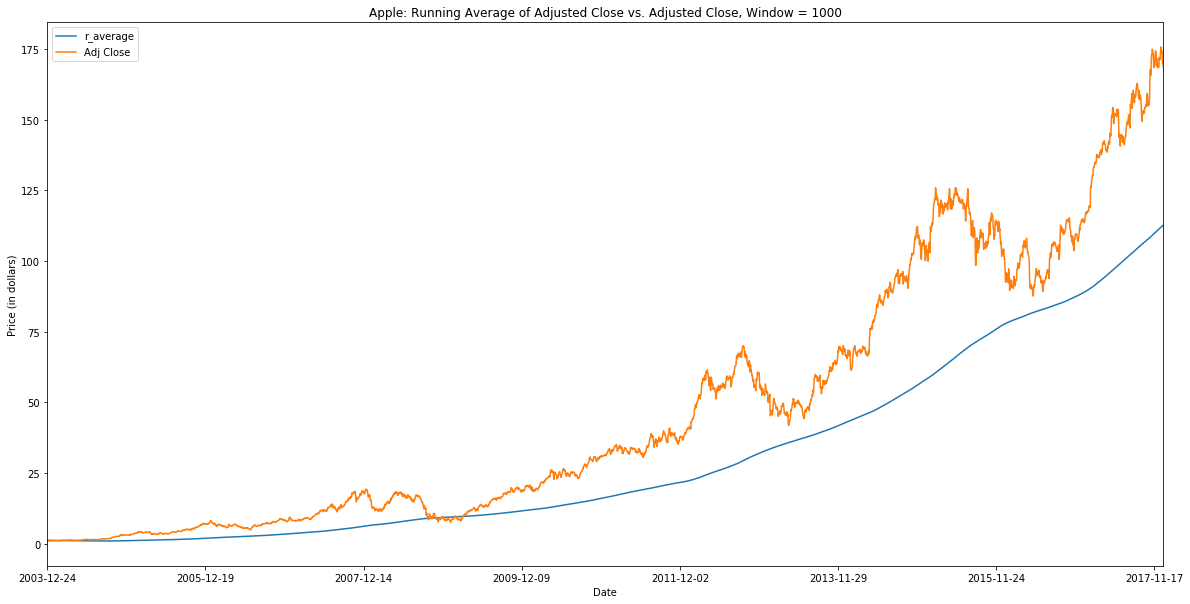

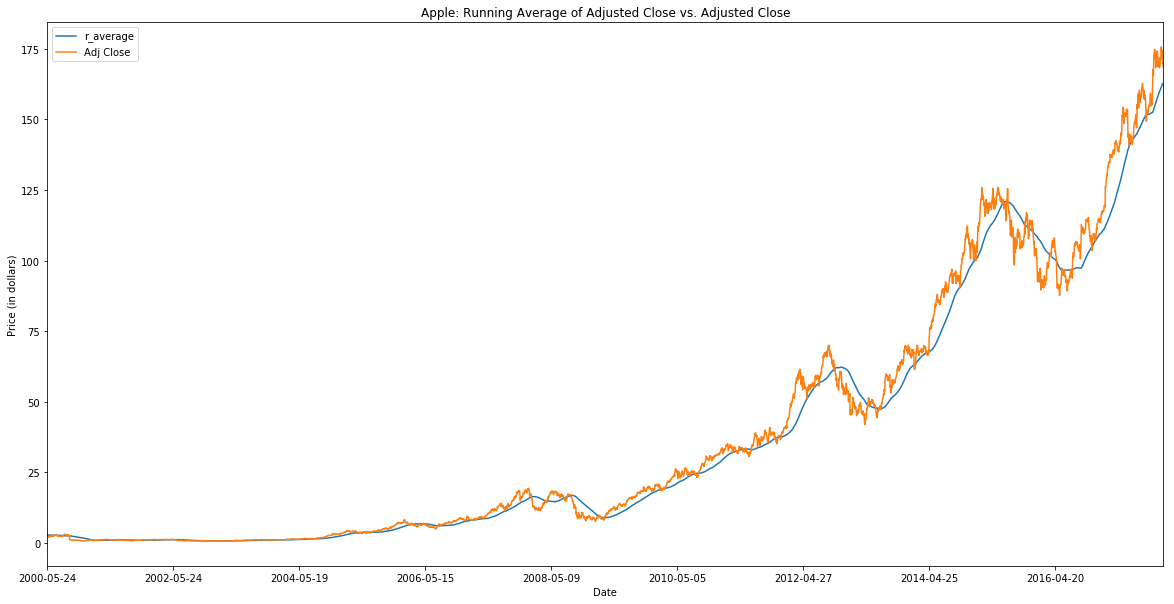

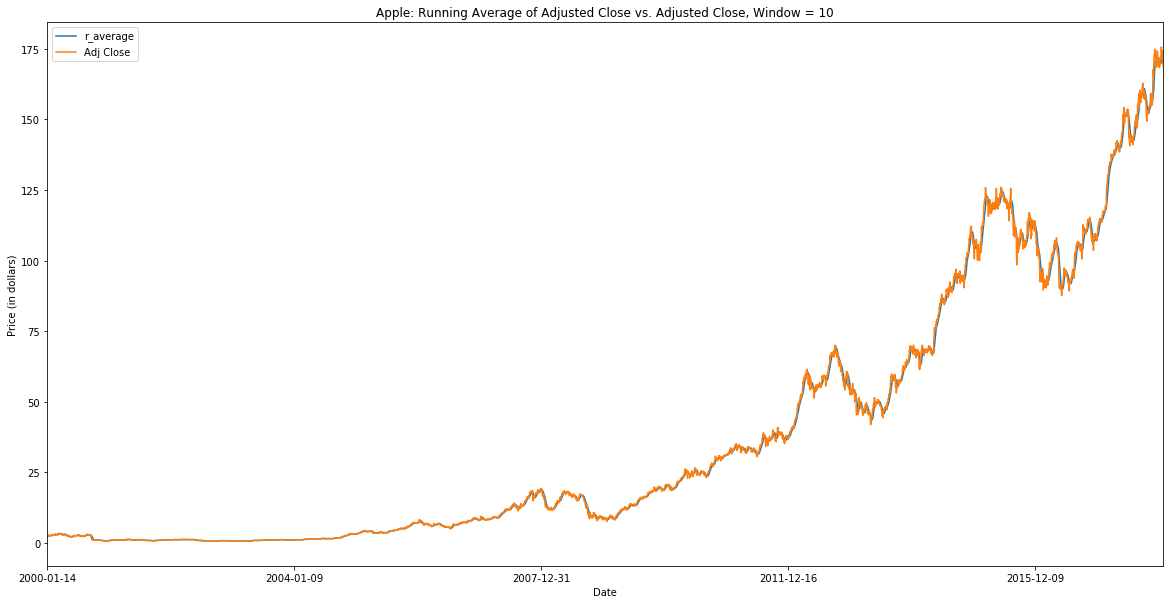

In [78]:
def moving_average(df,window=50):
    #df is a pandas data frame that has the column for "close".
    df["r_average"]= df["Adj Close"].rolling(window).mean()
    ma = df.drop(df.columns[[0,1,2,3,4]],1)
    ma.dropna(inplace= True)
    return ma

mvg_avg_3 = moving_average(df,1000)
mvg_avg_3["Adj Close"] = df["Adj Close"]
mvg_avg_3 = mvg_avg_3.plot(title = "Apple: Running Average of Adjusted Close vs. Adjusted Close, Window = 1000")
mvg_avg_3.set_xlabel("Date")
mvg_avg_3.set_ylabel("Price (in dollars)")


mvg_avg = moving_average(df,window=100)
mvg_avg["Adj Close"] = df["Adj Close"]
mvg_avg = mvg_avg.plot(title = "Apple: Running Average of Adjusted Close vs. Adjusted Close")
mvg_avg.set_xlabel("Date")
mvg_avg.set_ylabel("Price (in dollars)")

mvg_avg_2 = moving_average(df,10)
mvg_avg_2["Adj Close"] = df["Adj Close"]
mvg_avg_2 = mvg_avg_2.plot(title = "Apple: Running Average of Adjusted Close vs. Adjusted Close, Window = 10")
mvg_avg_2.set_xlabel("Date")
mvg_avg_2.set_ylabel("Price (in dollars)")

plt.show()
    

As we can see, the rolling average will give us a smoother price curve. The reason we want to smooth our price is because we want to get rid of some of the noise and other small changes in price  that are distract us from the overall trend. The window is how much of the data is getting averaged. As we can see, the larger the window, the more the moving average graph will stray away from the original graph. As we can see, with a window of 1000, the moving average graph(in blue) only resembles the original in the sense that it is increasing. However, by decreasing our window, we get closer and closer to the original line(a window of 1 is just the original graph). As someone who is studying the moving average, we need to choose the window depending on the need of my data. In our case, a window of 50 strikes the right balance. 

Now, let’s take the the time to do some calculations. One of the most common and basic form of calculation for financial data is the compound return of the S&P 500. The S&P is just the 500-ish largest stocks by market capitalization traded on the New York Stock Exchange.  Before we compute the compound return, lets just first the 500 companies and their tickers first. We will do this by scraping the wikipedia page that lists all of the S&P 500 companies.

In [80]:
def get_sp():
    r = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
    html = r.text
    root = BeautifulSoup(html,'html.parser')
    table= root.find("table",{"class":"wikitable sortable"})
    tickers = []
    count = 0
    count1 = 0
    raw = []
    for row in table.findAll("tr")[1:]:
        first = row.findAll("td")[0]
        first = str(first)
        raw.append(first)
        
    for i in range(len(raw)):
        org = raw[i]
        curr = raw[i]
        start = 0
        count = 0
        for k in range(len(curr)):
            if curr[k] == ">":
                count +=1
            if count ==2:
                start = k+1
                break
            
        length = len(curr)
        curr = curr[start:length-9]
        tickers.append(curr)

    return tickers
sp = get_sp()
print(sp)        

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI

Now we have all of the tickers for the S&P 500 as a list of string. The next logical step is to determine how, on average the S&P 500 is doing relative to our selection of companies. Our next step is to download the data, combine them all into one dataframe, and calculate the compounded return of the S&P over the last 10 years. The way the function computes that cumulative average is by obtaining the adjusted close of all of the companies in the S&P, resampling the data to what the user wants(default is not resample), and adding all of the data frames to a list called master. We then combine our seperate dataframes into one large one. After that, we find the percentage change of all of the companies from day to day. When we find that, we then add one to the average. That way, when we do the sum multiple, we are able to find the compund return just by mulitplying. The same is done with the portfolio.  

                     avg_day S&P  compound S&P  avg_day portfolio  \
Date                                                                
2010-01-05 00:00:00     0.991860      0.991860           1.003401   
2010-01-06 00:00:00     1.003147      0.994982           1.000826   
2010-01-07 00:00:00     1.007722      1.002665           1.000949   
2010-01-08 00:00:00     1.002348      1.005019           0.999216   
2010-01-11 00:00:00     1.012740      1.017822           0.999664   

                     compound portfolio  
Date                                     
2010-01-05 00:00:00            1.003401  
2010-01-06 00:00:00            1.004230  
2010-01-07 00:00:00            1.005182  
2010-01-08 00:00:00            1.004394  
2010-01-11 00:00:00            1.004057  


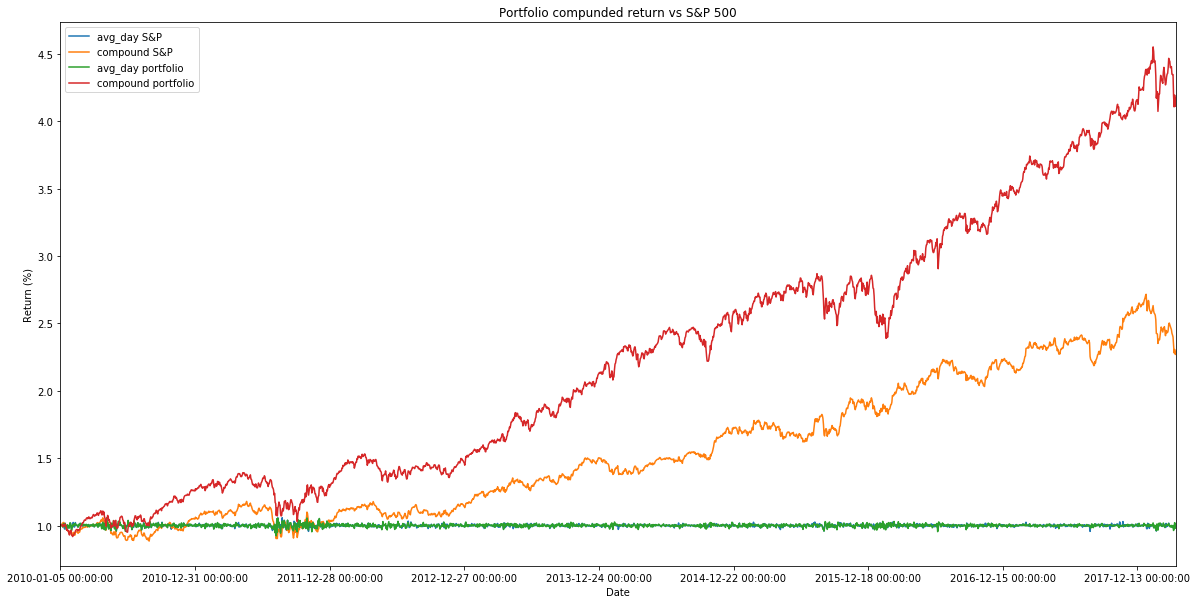

In [125]:
market= get_sp()[0:20] #due to space limitations, only use  20
#portfolio = ["WM","XRAY","PNC","NOV","MO","MNST","MMM"] #list of stocks
portfolio = ["WM","XRAY"]
master_resampled = [] #resampled data  for S&P
portfolio_resampled= []

def download_SP():
    second = []
    for i in market:
        download_csv(i)
    for j in portfolio:
        if j not in market:
            download_csv(j)
    

def protfolio_cum_return(market,window="1D"):
    for i in range(len(market)):
        current = market[i] #current company
        df = pd.read_csv("%s.csv"%current,index_col = 0,parse_dates=['Date'])
        df.drop(["Low","Close","Open","High","Volume"],1,inplace=True) #only adj close
        df_resampled = df.reset_index().set_index('Date').resample('%s'%(window)).mean() #resample
        df.rename(index=str,columns = {"Adj Close":"%s"%str(current)},inplace=True)
        df_resampled.rename(index=str,columns = {"Adj Close":"%s"%str(current)},inplace=True)
        master_resampled.append(df_resampled)
        
    for i in range(len(portfolio)):
        current = portfolio[i]
        df = pd.read_csv("%s.csv"%current,index_col = 0,parse_dates=['Date'])
        df.drop(["Low","Close","Open","High","Volume"],1,inplace=True) #only adj close
        df_resampled = df.reset_index().set_index('Date').resample('%s'%(window)).mean() #resample
        df.rename(index=str,columns = {"Adj Close":"%s"%str(current)},inplace=True)
        df_resampled.rename(index=str,columns = {"Adj Close":"%s"%str(current)},inplace=True)
        portfolio_resampled.append(df_resampled)
        
    new_df_resampled = master_resampled.pop(0)
    new_portfolio_resampled = portfolio_resampled.pop(0)
    
    for p in range(len(master_resampled)): #combine dataframe into one
        new_df_resampled = new_df_resampled.merge(master_resampled[p],left_index = True, right_index=True,how="outer")
    for o in range(len(portfolio_resampled)):
        new_portfolio_resampled = new_portfolio_resampled.merge(portfolio_resampled[o],left_index = True, right_index=True,how="outer")
    
    
    diff_df = new_df_resampled.pct_change()
    diff_df = diff_df.transpose()
    diff_df = diff_df.mean(axis="rows").dropna() # average for that day 
    diff_df = diff_df.to_frame("avg_day")
    diff_df["avg_day"] +=1
    diff_df["compound"] = diff_df["avg_day"].cumprod()
    
    diff_p = new_portfolio_resampled.pct_change()
    diff_p = diff_p.transpose()
    diff_p = diff_p.mean(axis="rows").dropna() # average for that day 
    diff_p = diff_p.to_frame("avg_day")
    diff_p["avg_day"] +=1
    diff_p["compound"] = diff_p["avg_day"].cumprod()
    
    diff_p = diff_p.merge(diff_df,left_index = True, right_index=True,how="outer") 
    #combine S&P and portfolio 
    diff_p.columns = ["avg_day S&P","compound S&P","avg_day portfolio", 'compound portfolio']
    print(diff_p.head())
    plot = diff_p.plot(title="Portfolio compunded return vs S&P 500")
    
    plot.set_xlabel("Date")
    plot.set_ylabel("Return (%)")
    plt.show()

download_SP() #run to download all the data (only first time)
protfolio_cum_return(market)
        
        
        
        
        
    

As we can clearly see, our portofio did better than our benchmark(only 20 shares of the S&P)! 
<br>
<br>
<br>
## Summary and references
To find learn more about data science and finance:
<br>
https://www.datacamp.com/community/tutorials/finance-python-trading
<br>
https://www.quantopian.com/
<br>
https://jakevdp.github.io/PythonDataScienceHandbook/
<br>
https://www.coursera.org/specializations/data-science-python
<br>

